In [1]:
import torch.nn as nn
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms


In [7]:
class SingleUnitXblock(nn.Module):
    """Basic network structure for X block"""
    def __init__(self, in_ch, out_ch):
        super(SingleUnitXblock, self).__init__()
        # self.selv_step_1 = nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, padding=1, groups=in_ch)
        # self.selv_step_2 = nn.BatchNorm2d(out_ch)
        # self.selv_step_3 = nn.ReLU()
        # self.selv_step_4 = nn.Conv2d(in_channels=out_ch, out_channels=out_ch, kernel_size=1, padding=0, groups=in_ch)
        # self.selv_step_5 = nn.BatchNorm2d(out_ch)
        # self.selv_step_6 = nn.ReLU()

        self.conv = nn.Sequential(
            # Level 1            
            nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, padding=1),            
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),            
            # Level 2
            nn.Conv2d(in_channels=out_ch, out_channels=out_ch, kernel_size=1, padding=0),            
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, input):        
        # print(f"Net execution!\n {input.shape}")    
        # result = self.selv_step_1(input)
        # print(f"Step 1: {result.shape}")
        # result = self.selv_step_2(result)
        # print(f"Step 2: {result.shape}")
        # result = self.selv_step_3(result)
        # print(f"Step 3: {result.shape}")        
        # result = self.selv_step_4(result)
        # print(f"Step 4: {result.shape}")
        # result = self.selv_step_5(result)
        # print(f"Step 5: {result.shape}")
        # result = self.selv_step_6(result)
        # print(f"Step 6: {result.shape}")
        

        result = self.conv(input)
        print(f"Single Unit {input.shape} after convolutions: {result.shape}")
        return result



In [8]:
class GroupSingleUnitXblock(nn.Module):
    """ 3 instances of single units of the X block """
    def __init__(self, in_ch, out_ch):
        super(GroupSingleUnitXblock, self).__init__()
        self.block = SingleUnitXblock(in_ch=in_ch, out_ch=out_ch)            

    def forward(self, x):
        # inner part x block
        print("===== Group of x blocks =====")
        for _ in range(3):
            print(x.shape)
            x = self.block(x)
        return x


In [27]:

class Xnet(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(Xnet, self).__init__()
        base_filter_num = 64

        # ====== X NET ===========                (1)         ()
        self.conv_down_1 = GroupSingleUnitXblock(in_ch, out_ch)
        self.pool1 = nn.MaxPool2d(2)
        # self.conv_down_2 = xblock(base_filter_num, base_filter_num*2)
        # self.pool2 = nn.MaxPool2d(2)
        # self.conv_down_3 = xblock(base_filter_num*2, base_filter_num*4)
        # self.pool3 = nn.MaxPool2d(2)
        # self.conv_bottom = xblock(base_filter_num*4, base_filter_num*8)
                
        # self.upsample_1 = nn.ConvTranspose2d(base_filter_num*8, base_filter_num*4, kernel_size=2, stride=2)
        # self.skip_conn_1 = skipConnection(base_filter_num*8, base_filter_num*4)
        # self.upsample_2 = nn.ConvTranspose2d(base_filter_num*4, base_filter_num*2, kernel_size=2, stride=2)
        # self.skip_conn_2 = skipConnection(base_filter_num*4, base_filter_num*2)
        # self.upsample_3 = nn.ConvTranspose2d(base_filter_num*2, base_filter_num, kernel_size=2, stride=2)
        # self.skip_conn_3 = skipConnection(base_filter_num*2, base_filter_num)
        # self.conv_out = nn.Conv2d(base_filter_num, out_ch, 1)

    def forward(self, x):
        ###down########   
        print("X Net execution")     
        down_1 = self.conv_down_1(x)
        print(down_1.shape)
        pool_1 = self.pool1(down_1)
        print(pool_1.shape)
        # down_2 = self.conv_down_2(pool_1)
        # pool_2 = self.pool2(down_2)
        # down_3 = self.conv_down_3(pool_2)
        # pool_3 = self.pool3(down_3)
        # bottom = self.conv_bottom(pool_3)

        # up_1 = self.upsample_1(bottom)
        # merge1 = torch.cat([up_1, down_3], dim=1)
        # #print(merge1.shape)
        # up_1_out = self.skip_conn_1(merge1)
        # up_2 = self.upsample_2(up_1_out)
        # merge2 = torch.cat([up_2, down_2], dim=1)
        # #print(merge2.shape)
        # up_2_out = self.skip_conn_2(merge2)
        # up_3 = self.upsample_3(up_2_out)
        # merge3 = torch.cat([up_3, down_1], dim=1)
        # #print(merge3.shape)
        # up_3_out = self.skip_conn_3(merge3)
        # end_out = self.conv_out(up_3_out)
        #print(end_out.shape)
        #out = nn.Sigmoid()(end_out)
        #print(out.shape)
        #out = nn.Sigmoid(end_out)

        return pool_1


In [ ]:
# Prediction with one image
img_file = "../dataset/validation/images/sub-r004s001_ses/0085.png"
with Image.open(img_file).convert("RGB") as input_image:
    input_image.show()
    input_image = np.array(input_image)
    print(input_image.shape)
#x = torch.randn((1, 1, 360, 360))    
#plt.plot(x[0,0,:,:])
#plt.show()    
val_transformations = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Grayscale(),
        transforms.Resize(size=(224,224)),
        transforms.ToTensor()
    ]
)
final_input_img = val_transformations(input_image)
print(type(final_input_img))
print(final_input_img.shape)
# # Adding batch of 1
final_input_img = torch.unsqueeze(final_input_img, dim=0)
print(f"Shape: {final_input_img.shape} Initial mage Sum: {torch.sum(final_input_img)} ")
with torch.no_grad():
    #model = SingleUnitXblock(in_ch=1, out_ch=1)
    model = GroupSingleUnitXblock(in_ch=1, out_ch=3)
    #model = Xnet(in_ch=1, out_ch=64)
    #print(model.shape)
    pred = model(final_input_img)
    print(pred.shape)
    # pred = torch.squeeze(pred, dim=1)
    # pred = pred.numpy()
    # pred = np.transpose(pred, (1,2,0))
    # print(f"{pred.shape} and {type(pred)}")
    # print(f"Max:{np.max(pred)} Min: {np.min(pred)}: Sum:{np.sum(pred)}")
    # #print(final_input_img.shape)
    # #assert pred.shape == final_input_img.shape
    # plt.imshow(pred, cmap="gray")
    # plt.show()
    # plt.close()
    

In [15]:
## ================= UNET ======================
from monai.networks.nets.unet import UNet
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import transforms

# path = "../dataset/train/images/sub-r001s001_ses/0000.png"

# with Image.open(path) as img:
#     print(type(img))
#     img = img.convert("L")
#     img = transforms.Resize(size=(256,256))(img)
#     img = transforms.ToTensor()(img)
    
#     print(img.shape)
#     plt.imshow(img[0,:,:], cmap="gray")

x = torch.randn((1, 1, 116, 224, 224))

print(x.shape)
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
)
result = model(x)
print(result.shape)
# print(x[0,:,0,:,:].shape)
# plt.plot(x[0,0,0,:,:])
# plt.show()
# plt.close()

torch.Size([1, 1, 116, 224, 224])


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 15 but got size 16 for tensor number 1 in the list.

torch.Size([1, 1, 32, 128, 128])
torch.Size([1, 1, 32, 128, 128])
tensor(0.5594, grad_fn=<MaxBackward1>)
tensor(-4.7682, grad_fn=<MinBackward1>)
Applying Sigmoid
tensor(0.6363, grad_fn=<MaxBackward1>)
tensor(0.0084, grad_fn=<MinBackward1>)
torch.Size([1, 128, 128])


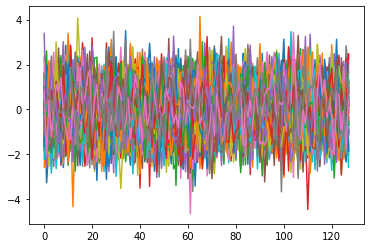

In [5]:
## ================= VNET ======================
from monai.networks.nets.vnet import VNet
import torch
import matplotlib.pyplot as plt
size = 128
x = torch.randn((1, 1, 32, size, size))
print(x.shape)
model = VNet(
    spatial_dims=3, 
    in_channels=1, 
    out_channels=1, 
    #act=('elu', {'inplace': True}), 
    dropout_prob=0.5, 
    #dropout_dim=3, 
    #bias=False
)
result = model(x)
print(result.shape)
print(torch.max(result))
print(torch.min(result))

print("Applying Sigmoid")
result = torch.sigmoid(result)
print(torch.max(result))
print(torch.min(result))

print(x[0,:,0,:,:].shape)
plt.plot(x[0,0,0,:,:])
plt.show()
plt.close()



torch.Size([1, 1, 32, 128, 128])
torch.Size([1, 1, 32, 128, 128])
tensor(5.0708, grad_fn=<MaxBackward1>)
tensor(-2.5641, grad_fn=<MinBackward1>)
Applying Sigmoid
tensor(0.9938, grad_fn=<MaxBackward1>)
tensor(0.0715, grad_fn=<MinBackward1>)
torch.Size([1, 128, 128])


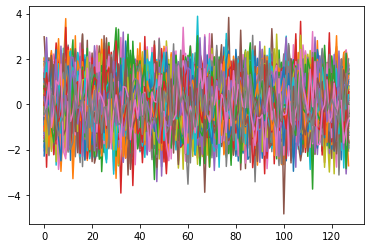

In [6]:
## ================= 3D UNET ======================
from monai.networks.nets.unet import UNet
import torch
import matplotlib.pyplot as plt
size = 128
x = torch.randn((1, 1, 32, size, size))
print(x.shape)
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
)
result = model(x)
print(result.shape)
print(torch.max(result))
print(torch.min(result))

print("Applying Sigmoid")
result = torch.sigmoid(result)
print(torch.max(result))
print(torch.min(result))

print(x[0,:,0,:,:].shape)
plt.plot(x[0,0,0,:,:])
plt.show()
plt.close()



In [2]:
import torch.nn as nn
import torch
from torch import autograd
from PIL import Image
from torchvision import transforms
import numpy as np
#network with 3 conv-and-deconv steps used in paper

class singleBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(singleBlock, self).__init__()
        self.conv = nn.Sequential(
            # Level 1
            nn.Conv2d(in_channels=in_ch, out_channels=out_ch, kernel_size=3, padding=1),            
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            # Level 2            
            nn.Conv2d(in_channels=out_ch, out_channels=out_ch, kernel_size=3, padding=1),            
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.2)   
        )

    def forward(self, input):
        x = self.conv(input)
        return x
        # x1 = self.conv(input)        
        # print(f"Adding Residuals between {input.shape} and {x1.shape} ")
        # # Residuals
        # x2 = x1 + input
        # return x2


class ResidualCustomUnet(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(ResidualCustomUnet, self).__init__()
        base_filter_num = 64
        
        # Encoder (Downsampling)
        self.conv_down_1 = singleBlock(in_ch, base_filter_num)
        self.pool1 = nn.MaxPool2d(2)
        self.conv_down_2 = singleBlock(base_filter_num, base_filter_num*2)
        self.pool2 = nn.MaxPool2d(2)
        self.conv_down_3 = singleBlock(base_filter_num*2, base_filter_num*4)
        self.pool3 = nn.MaxPool2d(2)
        self.conv_bottom = singleBlock(base_filter_num*4, base_filter_num*8)
        
        # Decoder (Upsampling)
        self.upsample_1 = nn.ConvTranspose2d(base_filter_num*8, base_filter_num*4, kernel_size=2, stride=2)
        self.conv_up_1 = singleBlock(base_filter_num*8, base_filter_num*4)
        self.upsample_2 = nn.ConvTranspose2d(base_filter_num*4, base_filter_num*2, kernel_size=2, stride=2)
        self.conv_up_2 = singleBlock(base_filter_num*4, base_filter_num*2)
        self.upsample_3 = nn.ConvTranspose2d(base_filter_num*2, base_filter_num, kernel_size=2, stride=2)
        self.conv_up_3 = singleBlock(base_filter_num*2, base_filter_num)
        self.conv_out = nn.Conv2d(base_filter_num, out_ch, 1)

    def forward(self, x):
        ###down########      
        print("Downsampling")  
        down_1 = self.conv_down_1(x)
        # Residuals res = x + down_1
        pool_1 = self.pool1(down_1)

        down_2 = self.conv_down_2(pool_1)
        # Residuals res = pool1 + down_2
        pool_2 = self.pool2(down_2)

        down_3 = self.conv_down_3(pool_2)
        # Residuals res = pool2 + down_3
        pool_3 = self.pool3(down_3)

        bottom = self.conv_bottom(pool_3)
        # Residuals res = pool_3 + bottom

        print("Upsampling")  
        up_1 = self.upsample_1(bottom)
        merge1 = torch.cat([up_1, down_3], dim=1)

        #print(merge1.shape)
        up_1_out = self.conv_up_1(merge1)
        # Add Residual => merge1 + up_1_out

        up_2 = self.upsample_2(up_1_out)
        merge2 = torch.cat([up_2, down_2], dim=1)        
        up_2_out = self.conv_up_2(merge2)
        # Add Residual => merge2 + up_2_out

        up_3 = self.upsample_3(up_2_out)
        merge3 = torch.cat([up_3, down_1], dim=1)                
        up_3_out = self.conv_up_3(merge3)
        # Add Residual => merge3 + up_3_out

        end_out = self.conv_out(up_3_out)
        # Applying classification in the output layer        
        out = nn.Sigmoid()(end_out)
        return out

    

In [5]:
x = torch.ones(1,1,224,224)
model = ResidualCustomUnet(in_ch=1, out_ch=1)
pred = model(x)
print(pred.shape)

print(sum(p.numel() for p in model.parameters() if p.requires_grad))

Downsampling
Upsampling
torch.Size([1, 1, 224, 224])
7701825


In [18]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
print(sys.path)

['C:\\Users\\vegaarellano\\Documents\\Gitlab\\instancesegmentation', 'C:\\Users\\vegaarellano\\Documents\\Gitlab\\instancesegmentation', 'c:\\Users\\vegaarellano\\Documents\\Gitlab\\instancesegmentation\\tests', 'C:\\Users\\vegaarellano\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\vegaarellano\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\vegaarellano\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\vegaarellano\\AppData\\Local\\Programs\\Python\\Python310', 'c:\\Users\\vegaarellano\\Documents\\Gitlab\\instancesegmentation\\pytorch-img-seg', '', 'c:\\Users\\vegaarellano\\Documents\\Gitlab\\instancesegmentation\\pytorch-img-seg\\lib\\site-packages', 'c:\\Users\\vegaarellano\\Documents\\Gitlab\\instancesegmentation\\pytorch-img-seg\\lib\\site-packages\\win32', 'c:\\Users\\vegaarellano\\Documents\\Gitlab\\instancesegmentation\\pytorch-img-seg\\lib\\site-packages\\win32\\lib', 'c:\\Users\\vegaarellano\\Documents\\Gitlab\\instan

In [2]:
from monai.networks.nets.attentionunet import AttentionUnet
import matplotlib.pyplot as plt
import torch
import os
# load models

def loadModel(file):
    #file="../validation/AttentionUnet_Adam_2022-08-03.pt"
    print(f"Load model from {file}")
    model_dict = {}
    device = "cuda" if torch.cuda.is_available() else "cpu"
    checkpoint = torch.load(file)
    return checkpoint["model"], checkpoint["val_dice"], checkpoint["val_iou"], checkpoint["val_loss"]

data = {}
for file in os.listdir("../validation/"):    
    if ".pt" in file:
        folder = f"../validation/{file}"
        m, d, iou, loss = loadModel(folder)
        data[m] = {}
        data[m]["dice"] = d
        data[m]["iou"] = iou
        data[m]["loss"] = loss

#print(data)
def getValues(data, requested_key):        
    values = {}
    values['models'] = [] 
    values['values'] = []
    for key,value in data.items():        
        values['models'].append(key)
        for k,v in value.items():
            if k == requested_key:
                values['values'].append(v)
    return values


Load model from ../validation/AttentionUnet_Adam_2022-09-09.pt
Load model from ../validation/CustomAttentionUnet_Adam_2022-09-13.pt
Load model from ../validation/ResUnetPlusPlus_Adam_2022-09-11.pt
Load model from ../validation/ResUnet_Adam_2022-09-11.pt
Load model from ../validation/UnetDeep4_Adam_2022-09-13.pt
Load model from ../validation/UNet_Adam_2022-09-08.pt


In [3]:
""" Export values from the model to csv to use it in Power BI"""
import pandas as pd

# report = {
#         "date": date.today(),            
#         'model' : results["model"],
#         'image' : results["image"],
#         'dsc'   : results["dsc"]
#     }
#     df = pd.DataFrame(report, index=[0])
#     df.to_csv("validation/DiceScore.csv", mode='a', index=False, header=False)


# Read values from model and prepare csv file 
data = {}
for file in os.listdir("../validation/"):    
    if ".pt" in file:
        folder = f"../validation/{file}"
        m, d, iou, loss = loadModel(folder)
        # For each value in the array of values
        for i in range(len(loss)):
            row = {}
            row["model"] = m
            row["epoch"] = i
            row["diceScore"] = d[i]
            row["iouScore"] = iou[i]
            row["loss"] = loss[i]
            df = pd.DataFrame(row, index=[0])
            df.to_csv("../validation/raw_data.csv", mode='a', index=False, header=False)        


#data
#pd.DataFrame(data=result["models"][0],    # values
#              index=range(len(result["models"][0])),    # 1st column as index
#              columns=["model","epoch","dice"])  # 1st row as the column names

Load model from ../validation/AttentionUnet_Adam_2022-09-09.pt
Load model from ../validation/CustomAttentionUnet_Adam_2022-09-13.pt
Load model from ../validation/ResUnetPlusPlus_Adam_2022-09-11.pt
Load model from ../validation/ResUnet_Adam_2022-09-11.pt
Load model from ../validation/UnetDeep4_Adam_2022-09-13.pt
Load model from ../validation/UNet_Adam_2022-09-08.pt


In [3]:
def getColorsForBestModel(list_of_values, _type=True):    
    highest = list_of_values["values"][0][-1]
    print(highest)
    colors = []        
    for i in range(len(list_of_values['values'])):
        colors.append("#dce1de")
        if _type:
            if list_of_values['values'][i][-1] > highest:
                colors[i] = "#023e8a"
        else:
            if list_of_values['values'][i][-1] < highest:
                colors[i] = "#023e8a"
    return colors


def PlotValues(list_of_values, name, colors = None):
    #colors = ["#03045e","#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4","#90e0ef" ]
    if colors is None:
        colors = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51","#606c38","#283618" ] # ["#dce1de","#023e8a","#dce1de","#dce1de","#dce1de","#dce1de","#dce1de" ]
    fig, ax = plt.subplots(figsize=(20, 15))
    for i in range(len(list_of_values['values'])):
        ax.plot(range(1,len(list_of_values['values'][i])+1), list_of_values['values'][i], color=colors[i])
    #ax.plot(range(1,len(values_1)+1), values_2, color="#A3A2AB")
    ax.set(xlabel='epochs', ylabel=name,title=name)
    #ax.title(name)
    #ax.title("Dice Score per model")
    ax.legend(list_of_values['models'], loc=0, frameon=False)
    #plt.xticks(range(0, len(list_of_values['values'][0]),5))
    ax.set_ylim(ymin=0)
    # ax.xaxis.label.set_color('gray')        #setting up X-axis label color to yellow
    # ax.yaxis.label.set_color('gray')          #setting up Y-axis label color to blue
    # ax.tick_params(axis='x', colors='gray', labelsize=8)    #setting up X-axis tick color to red
    # ax.tick_params(axis='y', colors='gray')  #setting up Y-axis tick color to black
    # ax.spines['left'].set_color('gray')        # setting up Y-axis tick color to red
    # ax.spines['top'].set_color('gray')  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    for i in range(len(list_of_values['values'])):
    #if "Loss" in name:
        plt.annotate(f"{(list_of_values['values'][i][-1]):.2f}",(len(list_of_values['values'][i]),list_of_values['values'][i][-1]), color='black', size=8)
    #else:
    #    plt.annotate(f"{np.mean(cpu_values[i]):.2f}",(len(cpu_values[i]),cpu_values[i][-1]), color='black', size=8)
    #plt.annotate(f"{np.mean(values_2):.2f}",(len(values_2),values_2[-1]), color='black', size=8)        
    plt.show()
    #plt.show()
    #plt.savefig(f'../validation/{name}.png', format="png")
    #plt.close(fig)
    

0.5390518775392451


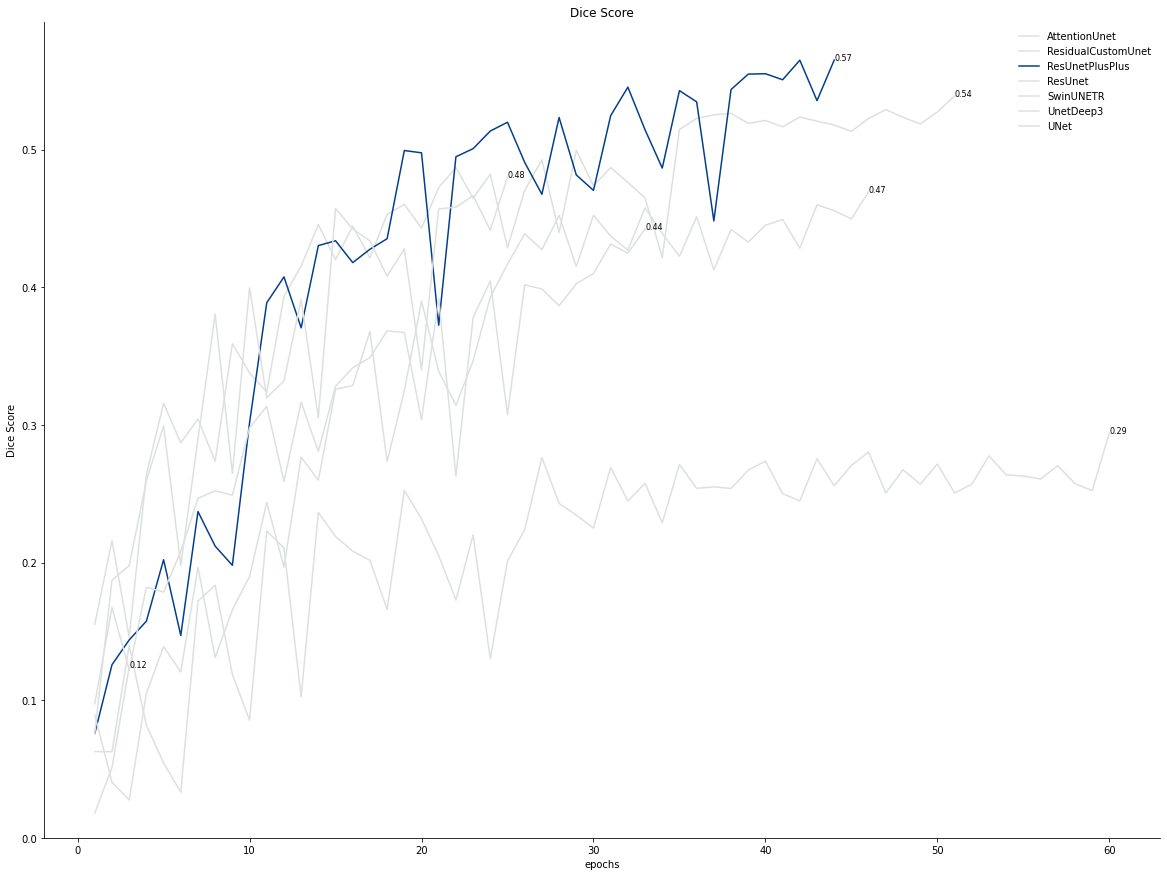

In [4]:
list_of_values = getValues(data, 'dice')
PlotValues(list_of_values, 'Dice Score', colors=getColorsForBestModel(list_of_values))

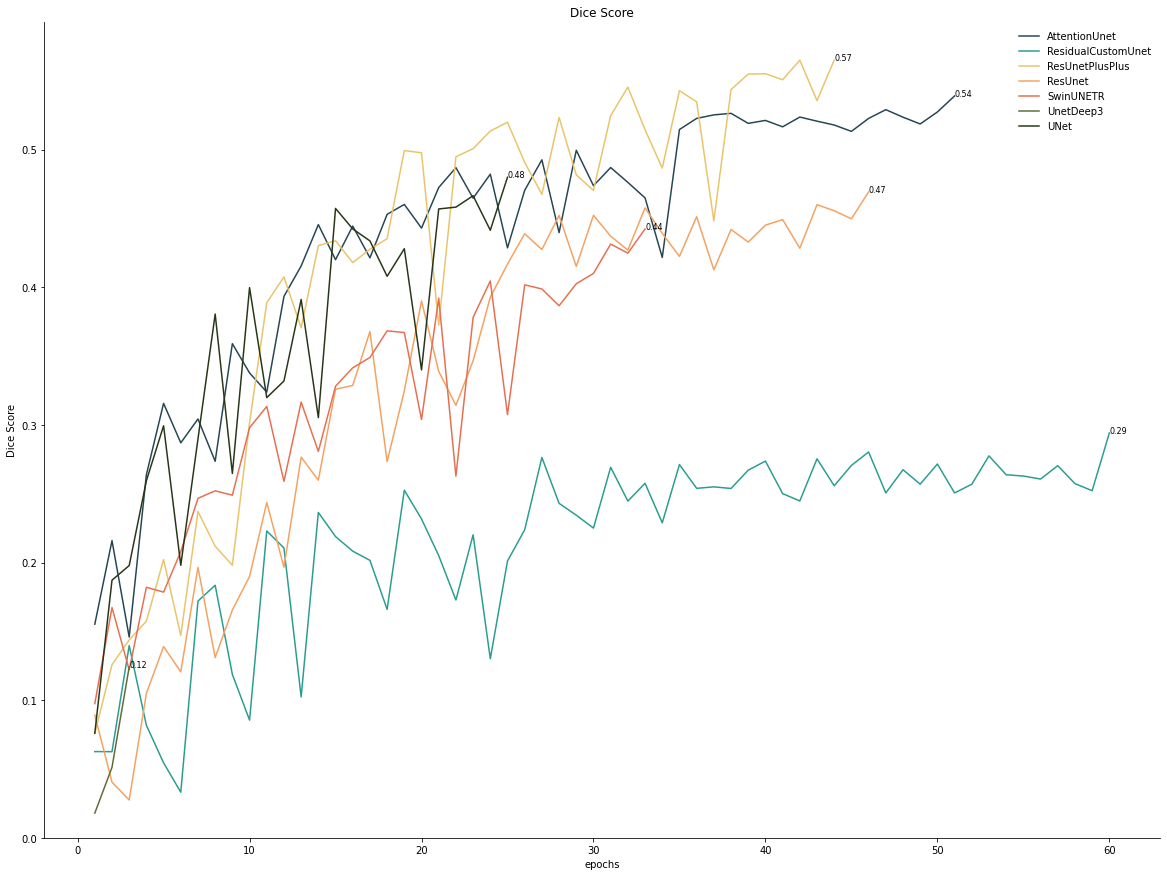

In [10]:
list_of_values = getValues(data, 'dice')
PlotValues(list_of_values, 'Dice Score')

0.4094567844078655


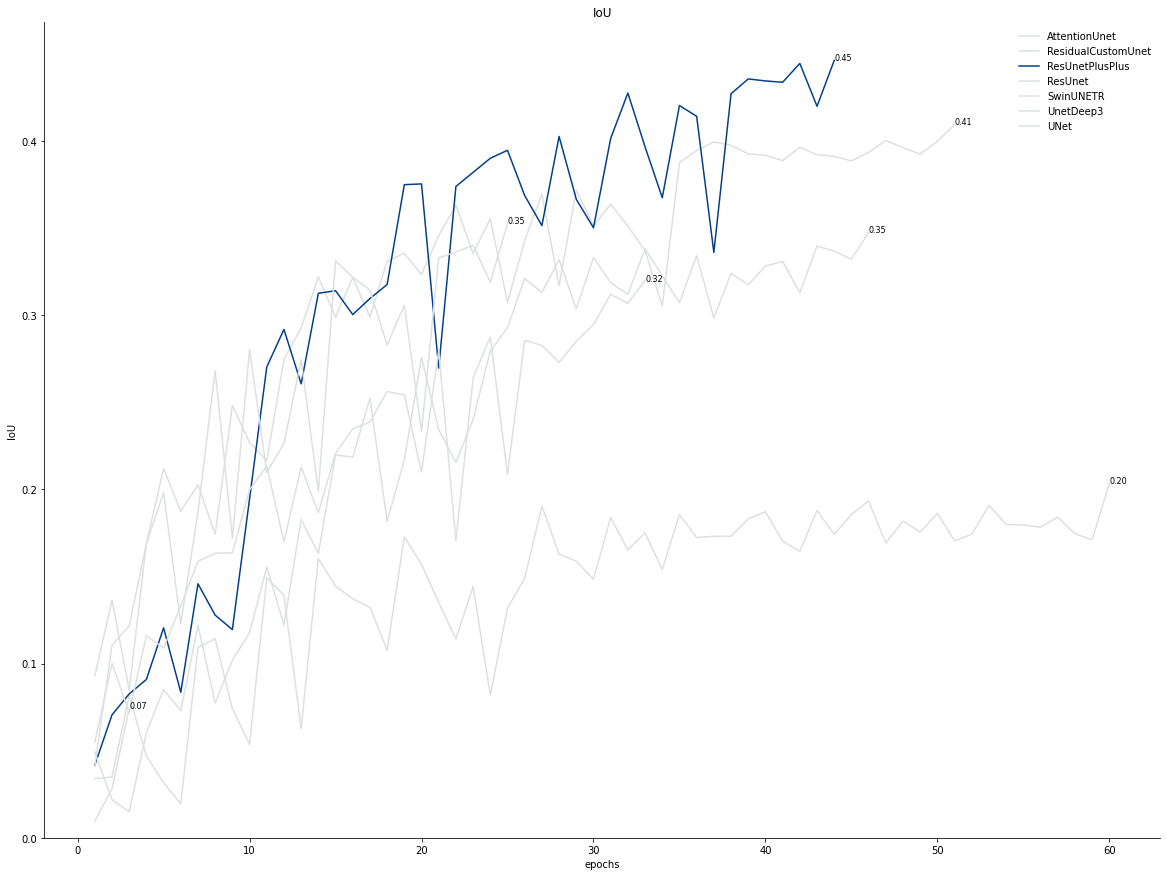

In [11]:
list_of_values = getValues(data, 'iou')
PlotValues(list_of_values, 'IoU', colors=getColorsForBestModel(list_of_values))

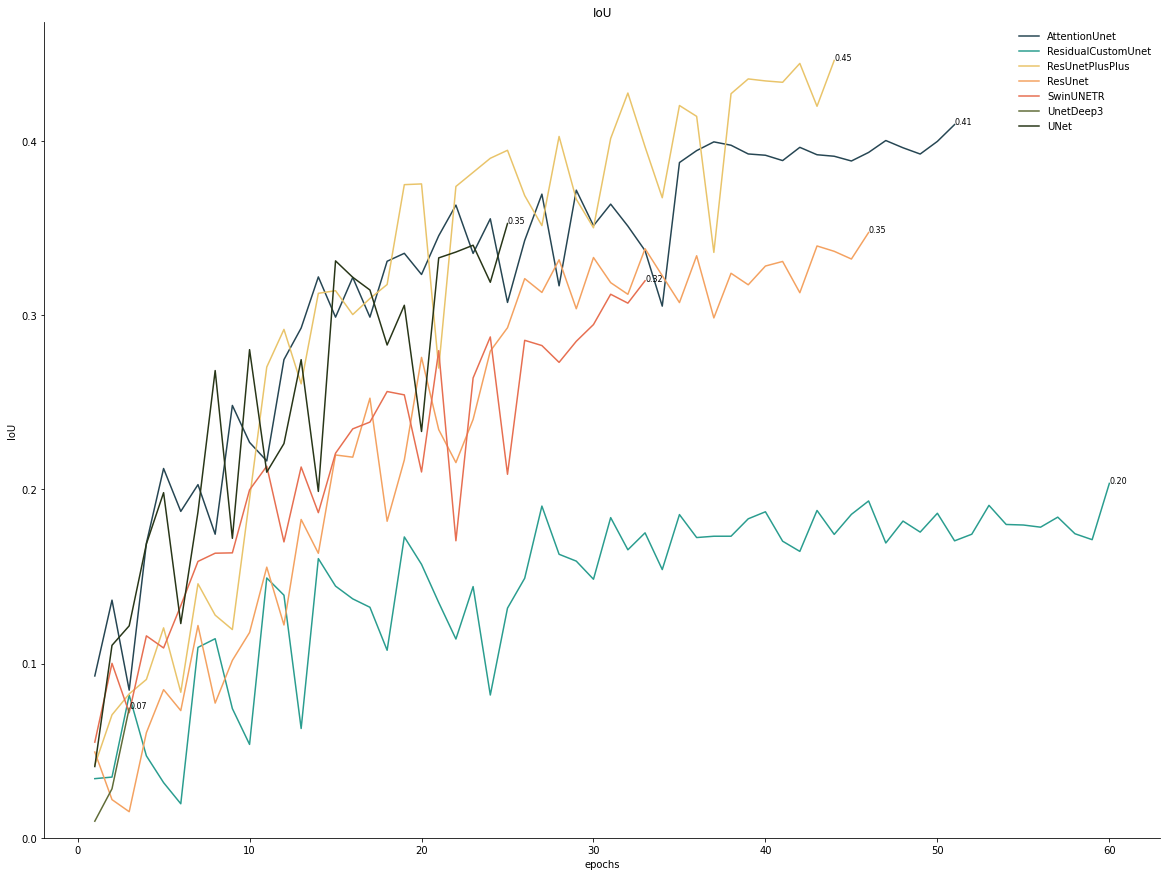

In [12]:
list_of_values = getValues(data, 'iou')
PlotValues(list_of_values, 'IoU')

0.4094567844078655


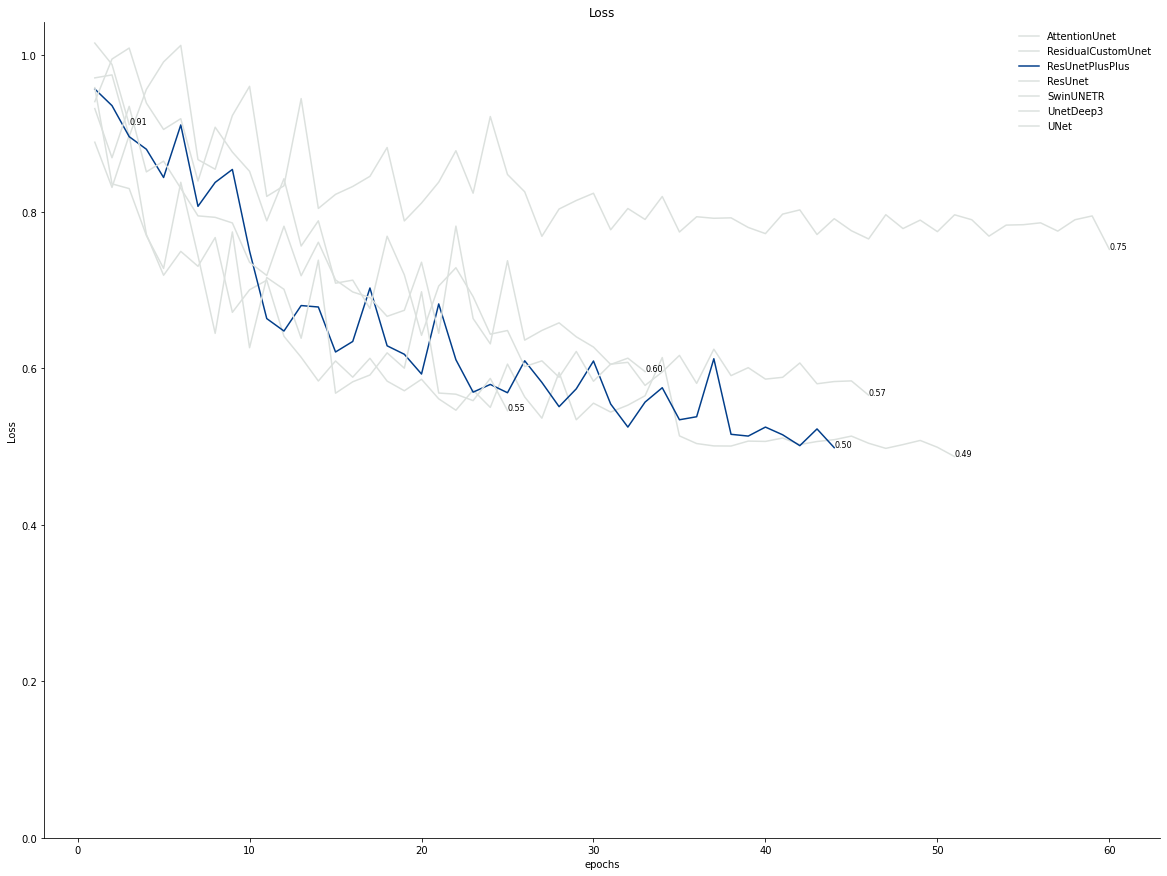

In [7]:
list_of_values = getValues(data, 'loss')
#PlotValues(list_of_values, "Loss")
PlotValues(list_of_values, 'Loss', colors=getColorsForBestModel(getValues(data, 'iou')))

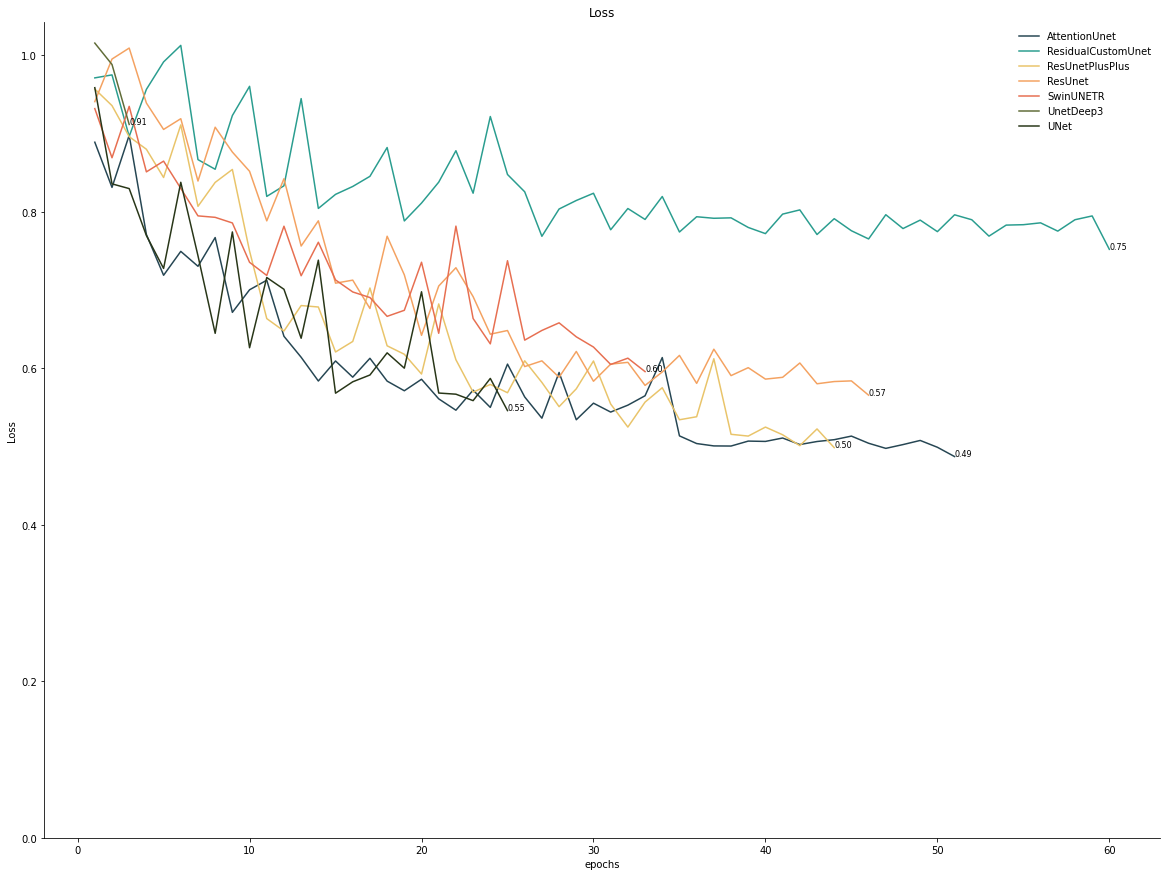

In [79]:
list_of_values = getValues(data, 'loss')
#PlotValues(list_of_values, "Loss")
PlotValues(list_of_values, 'Loss')

tensor([ 0.1579, -0.7576,  1.6094, -1.5795,  0.9511])


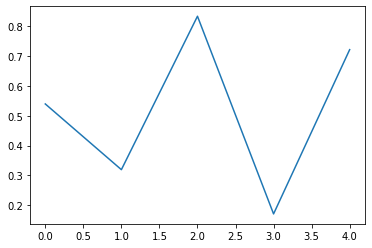

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
m = nn.Sigmoid()
input = torch.randn(5)
print(input)
output = m(input)
plt.plot(output)

C:\Users\vegaarellano\AppData\Local\Temp\ipykernel_24488\183661789.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  input = torch.range(n*-1,n,1)


Text(0, 0.5, 'f(x)')

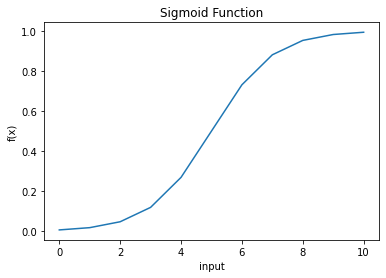

In [44]:
n = 5
input = torch.range(n*-1,n,1)
plt.plot(m(input))
plt.title("Sigmoid Function")
plt.xlabel("input")
plt.ylabel("f(x)")

C:\Users\vegaarellano\AppData\Local\Temp\ipykernel_24488\3529148507.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  input = torch.range(n*-1,n,1)


Text(0, 0.5, 'f(x)')

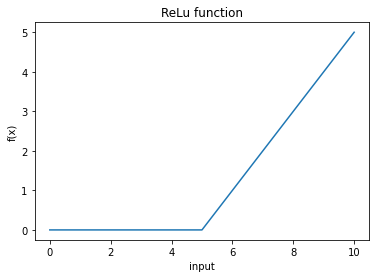

In [48]:
n = 5
input = torch.range(n*-1,n,1)
plt.plot(nn.ReLU()(input))
plt.title("ReLu function")
plt.xlabel("input")
plt.ylabel("f(x)")

C:\Users\vegaarellano\AppData\Local\Temp\ipykernel_24488\308911437.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  input = torch.range(n*-1,n,1)


Text(0, 0.5, 'f(x)')

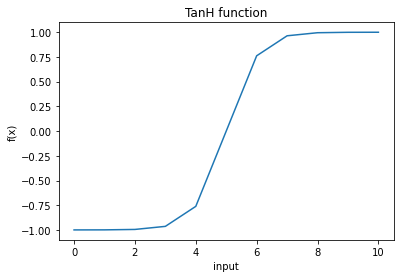

In [50]:
n = 5
input = torch.range(n*-1,n,1)
plt.plot(nn.Tanh()(input))
plt.title("TanH function")
plt.xlabel("input")
plt.ylabel("f(x)")

tensor([2.8699e-05, 7.8011e-05, 2.1206e-04, 5.7643e-04, 1.5669e-03, 4.2593e-03,
        1.1578e-02, 3.1472e-02, 8.5550e-02, 2.3255e-01, 6.3213e-01])
tensor(1.0000)


C:\Users\vegaarellano\AppData\Local\Temp\ipykernel_24488\2495141165.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  input = torch.range(n*-1,n,1)
C:\Users\vegaarellano\AppData\Local\Temp\ipykernel_24488\2495141165.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  res = nn.Softmax()(input)


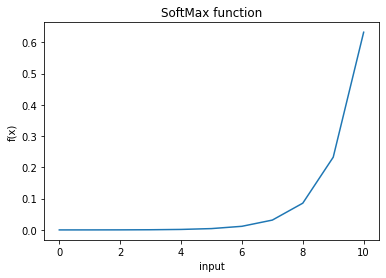

In [53]:
n = 5
input = torch.range(n*-1,n,1)
res = nn.Softmax()(input)
plt.plot(res)
plt.title("SoftMax function")
plt.xlabel("input")
plt.ylabel("f(x)")
print(res)
print(torch.sum(res))

C:\Users\vegaarellano\AppData\Local\Temp\ipykernel_24488\2923545167.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  input = torch.range(n*-1,n,1)


Text(0, 0.5, 'f(x)')

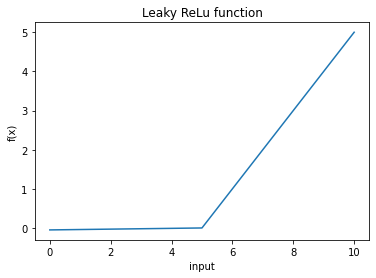

In [55]:
n = 5
input = torch.range(n*-1,n,1)
res = nn.LeakyReLU()(input)
plt.plot(res)
plt.title("Leaky ReLu function")
plt.xlabel("input")
plt.ylabel("f(x)")

In [38]:
from torchmetrics import JaccardIndex
from sklearn.metrics import confusion_matrix
torch.manual_seed(200)
target = torch.randint(0, 2, (1, 5, 5))
print(target)
pred =torch.randint(0, 2, (1, 5, 5))
print(pred)
#pred[2:5, 7:13, 9:15] = 1 - pred[2:5, 7:13, 9:15]
jaccard = JaccardIndex(num_classes=2)
print(jaccard(pred, target))
#jaccard = JaccardIndex(num_classes=3)
#print(jaccard(pred, target))
#cf_matrix = confusion_matrix(target.numpy(), pred.numpy())
#cf_matrix

tensor([[[0, 1, 0, 0, 0],
         [1, 0, 1, 1, 0],
         [1, 1, 1, 1, 0],
         [0, 0, 1, 1, 1],
         [1, 1, 1, 1, 0]]])
tensor([[[1, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 0, 1],
         [0, 1, 1, 1, 1],
         [0, 0, 1, 0, 0]]])
tensor(0.3139)


In [34]:
def diceScore(input, target):
    """ Calculate the dice score"""
    smooth = 1e-9
    iflat = input.reshape(-1)
    tflat = target.reshape(-1)
    intersection = (iflat * tflat).sum()
    union =  (iflat.sum() + tflat.sum())
    result = (2. * intersection) / max(union, smooth)    
    return result


In [36]:

def intersectionOverUnion(prediction, ground_truth):
    """ Calculate the IoU metric """        
    pflat = prediction.reshape(-1)
    gflat = ground_truth.reshape(-1)        
    smooth = 1e-9
    intersection = (gflat * pflat).sum()
    union = gflat.sum() + pflat.sum() - intersection         
    iou = intersection / max(union, smooth)        
    return iou

In [39]:
#diceScore(pred, target)
intersectionOverUnion(pred, target)

tensor(0.3500)

In [18]:
from collections import OrderedDict
models_data = [
    {
        "model" : "Attention U-Net",
        "parameters" : 1905321,
        "avg_dice_score": 0.31,
        "avg_iou": 0.21
    },
    {
        "model" : "ResU-Net++",
        "parameters" : 14481412,
        "avg_dice_score": 0.28,
        "avg_iou": 0.19
    },
    {
        "model" : "U-Net",
        "parameters" : 1511124,
        "avg_dice_score": 0.28,
        "avg_iou": 0.18
    },
    {
        "model" : "ResU-Net",
        "parameters" : 13040705,
        "avg_dice_score": 0.26,
        "avg_iou": 0.17
    },
    {
        "model" : "Custom ResU-Net",
        "parameters" : 10803201,
        "avg_dice_score": 0.19,
        "avg_iou": 0.12
    },
    {
        "model" : "Swin UNETR",
        "parameters" : 6302203,
        "avg_dice_score": 0.15,
        "avg_iou": 0.09
    },
    {
        "model" : "Custom U-Net",
        "parameters" : 7701825,
        "avg_dice_score": 0.02,
        "avg_iou":0.01
    },

]


# input = torch.range(n*-1,n,1)
# plt.plot(nn.Tanh()(input))
# plt.title("TanH function")
# plt.xlabel("input")
# plt.ylabel("f(x)")

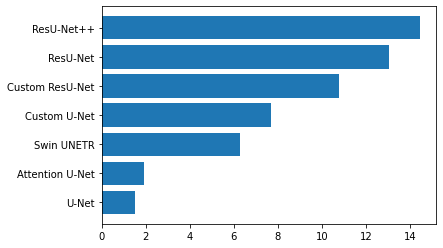

In [21]:
# Plot 
models_data = sorted(models_data, key=lambda x: x["parameters"], reverse=False)
values = []
names = []
for i in range(0,len(models_data)):
    values.append(models_data[i]["parameters"]/1000000)
    names.append(models_data[i]["model"])

# create dataset
height = values
bars = names
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

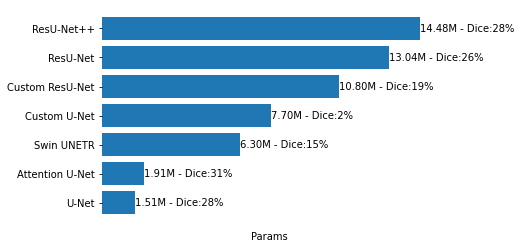

In [78]:
# Plot 
# avg_dice_score
# avg_iou
name_key = "avg_dice_score"
models_data = sorted(models_data, key=lambda x: x["parameters"], reverse=False)
avg_dice = []
names = []
params = []
for i in range(0,len(models_data)):
    avg_dice.append(f'{models_data[i]["parameters"]/1000000:.2f}M - Dice:{models_data[i]["avg_dice_score"]*100:.0f}%')
    names.append(models_data[i]["model"])
    params.append(models_data[i]["parameters"]/1000000)

# create dataset
height = params
bars = names
y_pos = np.arange(len(bars))

# First make a subplot, so that axes is available containing the function bar_label.
fig, ax = plt.subplots()
g = ax.barh(bars, height)
ax.set_xlabel("Params")
ax.set_ylabel("")
ax.xaxis.label.set_color('black')        #setting up X-axis label color to yellow
#ax.yaxis.label.set_color('gray')          #setting up Y-axis label color to blue
#ax.tick_params(axis='y', colors='gray', labelsize=8)    #setting up X-axis tick color to red
#ax.tick_params(axis='y', colors='gray')  #setting up Y-axis tick color to black
#ax.spines['left'].set_color('gray')        # setting up Y-axis tick color to red
#ax.spines['top'].set_color('gray')  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.bar_label(g, labels=avg_dice, label_type="edge") # This provides the labelling, this only available at higher version. You can do pip install -U matplotlib
plt.xticks([])
#plt.yticks([])
plt.show()


# # create dataset
# height = values
# bars = names
# y_pos = np.arange(len(bars))
 
# # Create horizontal bars
# plt.barh(y_pos, height)
 
# # Create names on the x-axis
# plt.yticks(y_pos, bars)
 
# # Show graphic
# plt.show()

In [32]:
from turtle import down, forward
import torch.nn as nn
import torch
from torch import autograd
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
#network with 3 conv-and-deconv steps used in paper

class SingleConvolution(nn.Module):

    def __init__(self, in_channels, out_channels):
        super(SingleConvolution, self).__init__()

        # Defining the hidden layers of the net 1,24
        # First hiddden layer
        self.conv = nn.Sequential(
            # convolution
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=1, stride=1),
            # batch normalization
            nn.BatchNorm2d(num_features=out_channels),
            # activation function
            nn.ReLU(inplace=True),
            # convolution
            nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, padding=1, stride=1),
            # batch normalization
            nn.BatchNorm2d(num_features=out_channels),
            # activation function
            nn.ReLU(inplace=True),
            # regularization
            #nn.Dropout2d(p=0.3) 
        )

    def forward(self, input):
        x = self.conv(input)
        return x

class AttentionBlock(nn.Module):

    def __init__(self, g, x_l, out_channels):
        super(AttentionBlock, self).__init__()
        self.input_g = nn.Sequential(
            nn.Conv2d(in_channels=g, out_channels=out_channels, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(out_channels)
        )
        self.input_x  = nn.Sequential(
            nn.Conv2d(in_channels=x_l, out_channels=out_channels, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=out_channels)            
        )
        self.psi = nn.Sequential(
            nn.Conv2d(in_channels=out_channels, out_channels=1, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_features=1),
            nn.Sigmoid()
        )
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, g, x):
        g1 = self.input_g(g) # [1, 512, 32, 32])    => [1, 256, 32, 32])
        x1 = self.input_x(x) # [1, 512, 32, 32]     => [1, 256, 32, 32])
        res = g1 + x1
        res = self.relu(res)
        res = self.psi(res) # [1, 1, 32, 32]
        res = x * res
        return res
    
class TestNetwork(nn.Module):

    def __init__(self, in_channels=1, out_channels=1):
        super(TestNetwork, self).__init__()

        base_filter_num = 24 # 32
        
        # Encoder
        #self.conv_down_1 =  nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3)  # 2  
        #self.conv_down_2 =  nn.Conv2d(in_channels=5, out_channels=1, kernel_size=3)  # 2  
        self.conv_down_1 = SingleConvolution(in_channels=in_channels, out_channels=base_filter_num) # 1 => 64
        #self.pool_1 = nn.MaxPool2d(2)

        # self.conv_down_2 = SingleConvolution(in_channels=base_filter_num, out_channels=base_filter_num*2) # 64 => 128
        # self.pool_2 = nn.MaxPool2d(2)

        # self.conv_down_3 = SingleConvolution(in_channels=base_filter_num*2, out_channels=base_filter_num*4) # 128 => 256
        # self.pool_3 = nn.MaxPool2d(2)

        # self.conv_down_4 = SingleConvolution(in_channels=base_filter_num*4, out_channels=base_filter_num*8) # 256 => 512
        # self.pool_4 = nn.MaxPool2d(2)

        # self.conv_down_5 = SingleConvolution(in_channels=base_filter_num*8, out_channels=base_filter_num*16) # 512 => 1024
        # #self.pool_5 = nn.MaxPool2d(2)

        # #self.conv_down_6 = SingleConvolution(in_channels=base_filter_num*16, out_channels=base_filter_num*8) # 512 => 1024

        # # Backbone
        # #self.conv_bottom = SingleConvolution(base_filter_num*16, base_filter_num*16)   # 1024 => 1024

        # # Decoder
        # self.upsample_1 = nn.ConvTranspose2d(base_filter_num*16, base_filter_num*8, kernel_size=2, stride=2)    # 1024 => 512
        # self.attention_1 = AttentionBlock(g=base_filter_num*8, x_l= base_filter_num*8, out_channels=base_filter_num*4) # 512, 512 => 256
        # self.conv_up_1 = SingleConvolution(base_filter_num*16, base_filter_num*8)

        # self.upsample_2 = nn.ConvTranspose2d(base_filter_num*8, base_filter_num*4, kernel_size=2, stride=2)
        # self.attention_2 = AttentionBlock(g=base_filter_num*4, x_l= base_filter_num*4, out_channels=base_filter_num*2)
        # self.conv_up_2 = SingleConvolution(base_filter_num*8, base_filter_num*4)

        # self.upsample_3 = nn.ConvTranspose2d(base_filter_num*4, base_filter_num*2, kernel_size=2, stride=2)
        # self.attention_3 = AttentionBlock(g=base_filter_num*2, x_l= base_filter_num*2, out_channels=base_filter_num)
        # self.conv_up_3 = SingleConvolution(base_filter_num*4, base_filter_num*2)

        # self.upsample_4 = nn.ConvTranspose2d(base_filter_num*2, base_filter_num, kernel_size=2, stride=2)
        # self.attention_4 = AttentionBlock(g=base_filter_num, x_l= base_filter_num, out_channels=base_filter_num//2)
        # self.conv_up_4 = SingleConvolution(base_filter_num*2, base_filter_num)

        # # Last layer
        # self.conv_out = nn.Conv2d(in_channels=base_filter_num, out_channels=out_channels, kernel_size=1)
    
    def forward(self, input): 
        # Encoder
        down_1 = self.conv_down_1(input)        # [1, 1, 256, 256]      => [1, 64, 256, 256]
        #down_2 = self.conv_down_2(down_1)        # [1, 1, 256, 256]      => [1, 64, 256, 256]
        #return down_1
        #pool_1 = self.pool_1(down_1)            # [1, 64, 256, 256]     => [1, 64, 128, 128]
        return down_1
        # down_2 = self.conv_down_2(pool_1)       # [1, 64, 128, 128]     => [1, 128, 128, 128]
        # pool_2 = self.pool_2(down_2)            # [1, 128, 128, 128]    => [1, 128, 64, 64]    
        # down_3 = self.conv_down_3(pool_2)       # [1, 128, 64, 64]      => [1, 256, 64, 64]    
        # pool_3 = self.pool_3(down_3)            # [1, 256, 64, 64]      => [1, 256, 32, 32]    
        # down_4 = self.conv_down_4(pool_3)       # [1, 256, 32, 32]      => [1, 512, 32, 32] 
        # pool_4 = self.pool_4(down_4)            # [1, 512, 32, 32]      => [1, 512, 16, 16] 
        # down_5 = self.conv_down_5(pool_4)       # [1, 512, 16, 16]      => [1, 1024, 16, 16] 
        # #pool_5 = self.pool_5(down_5)           # [1, 1024, 16, 16]     => [1, 1024, 8, 8] 

        # # Backbone
        # #bottom = self.conv_bottom(down_5)           # [1, 1024, 16, 16]       => [1, 1024, 16, 16]

        # # Decoder
        # up_1 = self.upsample_1(down_5)              # [1, 1024, 16, 16]     => [1, 512, 32, 32]  
        # at_1 = self.attention_1(up_1, down_4)       # [1, 512, 32, 32]
        # up_1 = torch.cat((at_1, down_4), dim=1)     # [1, 1024, 32, 32] 
        # up_1 = self.conv_up_1(up_1)                 # [1, 1024, 32, 32]     => [1, 512, 32, 32]

        # up_2 = self.upsample_2(up_1)                # [1, 512, 32, 32]      => [1, 256, 64, 64]
        # at_2 = self.attention_2(up_2, down_3)       # [1, 256, 64, 64]      
        # up_2 = torch.cat((at_2, down_3), dim=1)     # [1, 512, 64, 64]
        # up_2 = self.conv_up_2(up_2)                 # [1, 512, 64, 64]      => [1, 256, 64, 64]

        # up_3 = self.upsample_3(up_2)                # [1, 256, 64, 64]      => [1, 128, 128, 128]
        # at_3 = self.attention_3(up_3, down_2)       # [1, 128, 128, 128]
        # up_3 = torch.cat((at_3, down_2), dim=1)     # [1, 256, 128, 128]
        # up_3 = self.conv_up_3(up_3)                 # [1, 256, 128, 128]    => [1, 128, 128, 128]

        # up_4 = self.upsample_4(up_3)                # [1, 128, 128, 128] => [1, 64, 256, 256]
        # at_4 = self.attention_4(up_4, down_1)       # [1, 64, 256, 256]
        # up_4 = torch.cat((at_4, down_1), dim=1)     # [1, 128, 256, 256]
        # up_4 = self.conv_up_4(up_4)                 # [1, 128, 256, 256] => [1, 64, 256, 256]

        # end_out = self.conv_out(up_4)               # [1, 64, 256, 256] => [1, 1, 256, 256]
        # # Applying classification in the output layer        
        #out = nn.Sigmoid()(end_out)
        #return out


   
import matplotlib.pyplot as plt

    

In [33]:

def testModel3Channels():
    x = torch.rand((1,1,10,10))            
    #print(x.shape)
    model = TestNetwork(in_channels=1, out_channels=1)
    pred = model(x)
    print(pred.shape)
    print(sum(p.numel() for p in model.parameters() if p.requires_grad))

def tryoutNumbers():
    numbers = []
    for n in range(256,0,-1):
        try:
            x = torch.rand((1,1,n,n))            
            print(f"Input shape: {x.shape}")
            #model = UnetDeep4(in_ch=1, out_ch=1)
            model = SingleConvolution(in_channels=1, out_channels=1)            
            pred = model(x)
            print(f"Prediction shape: {pred.shape}")
            #print(pred.shape)
            numbers.append(n)
        except:
            pass
    print(numbers)
    # plt.plot(pred[0,0,:,:].detach().numpy())
    # plt.show()
    # plt.close()

def testSingleCNN():    
    # Prediction with one image
    img_file = "dataset/validation/images/sub-r004s001_ses/0085.png"
    with Image.open(img_file).convert("L") as input_image:
        input_image.show()
        input_image = np.array(input_image)
    #x = torch.randn((1, 1, 360, 360))    
    #plt.plot(x[0,0,:,:])
    #plt.show()    
    val_transformations = transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Grayscale(),
            transforms.Resize(size=(224,224)),
            transforms.ToTensor()
        ]
    )
    final_input_img = val_transformations(input_image)
    print(type(final_input_img))
    print(final_input_img.shape)
    # # Adding batch of 1
    final_input_img = torch.unsqueeze(final_input_img, dim=0)
    print(final_input_img.shape)
    with torch.no_grad():
        #model = one_step_conv(in_ch=1, out_ch=1)
        model = TestNetwork(in_channels=1, out_channels=1)
        pred = model(final_input_img)        
        print(pred.shape)
        print(torch.max(pred))
        print(torch.min(pred))
        pred = (pred > 0.5).float()
        print(torch.max(pred))
        print(torch.min(pred))
        pred = torch.squeeze(pred, dim=1)
        pred = pred.numpy()
        pred = np.transpose(pred, (1,2,0))
        print(f"{pred.shape} and {type(pred)}")
        #print(final_input_img.shape)
        #assert pred.shape == final_input_img.shape
        plt.imshow(pred, cmap="gray")
        plt.show()
        plt.close()
    print(sum(p.numel() for p in model.parameters() if p.requires_grad))



testModel3Channels()

torch.Size([1, 24, 3, 3])
5496
